In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
# Contoh data penjualan (bisa diambil dari sumber data asli)
file_path = r"C:\Users\HP\Documents\data mining\multiTimeline.csv"
df = pd.read_csv(file_path)

# Show the first few rows and the structure of the dataset
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, Month to 2024-10
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  251 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


(            Category: All categories
 Month    tren penjualan: (Worldwide)
 2004-01                            0
 2004-02                            0
 2004-03                            0
 2004-04                            0,
 None)

In [16]:
# Step 1: Clean the dataset
# Rename the columns for easier access
df_cleaned = df.rename(columns={'Category: All categories': 'Sales'})

In [17]:
# Reset the index and convert 'Month' column to datetime
df_cleaned = df_cleaned.reset_index().rename(columns={'index': 'Date'})
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_10696\3616704758.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [18]:
# Remove rows with NaT in 'Date' column (if any)
df_cleaned = df_cleaned.dropna(subset=['Date'])

In [19]:
# Convert 'Sales' to numeric values (if needed, since they might be strings)
df_cleaned['Sales'] = pd.to_numeric(df_cleaned['Sales'], errors='coerce')

In [20]:
# Drop rows with NaN in 'Sales' after conversion
df_cleaned = df_cleaned.dropna(subset=['Sales'])

In [21]:
# Verify the cleaned dataset
df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Sales   250 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


(        Date  Sales
 1 2004-01-01      0
 2 2004-02-01      0
 3 2004-03-01      0
 4 2004-04-01      0
 5 2004-05-01      0,
 None)

In [22]:
# Set the cleaned data as the main dataframe
df_final = df_cleaned.copy()

In [23]:
# Use Date as the index for easier plotting
df_final.set_index('Date', inplace=True)

In [24]:
# Preparing data for the model
X = np.arange(len(df_final)).reshape(-1, 1)  # Using the time progression as a feature (days from start)
y = df_final['Sales'].values  # Sales as the target

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict sales on the test set
y_pred = model.predict(X_test)

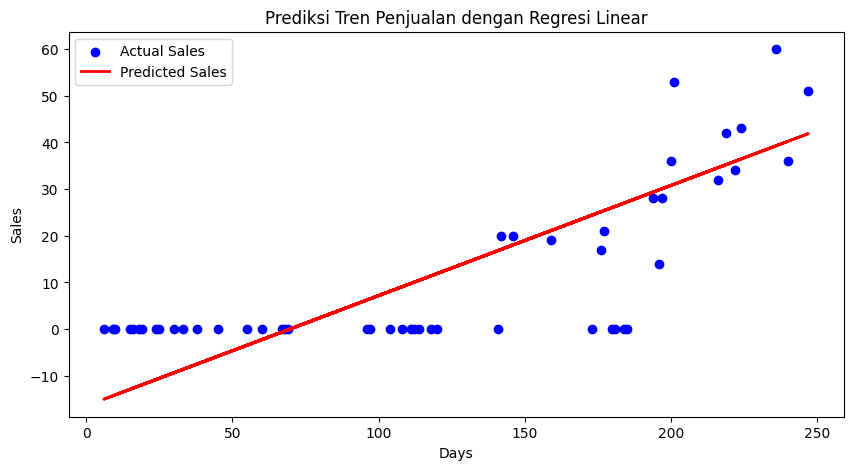

In [28]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Prediksi Tren Penjualan dengan Regresi Linear')
plt.legend()
plt.show()